In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from data_analysis.helpers import *

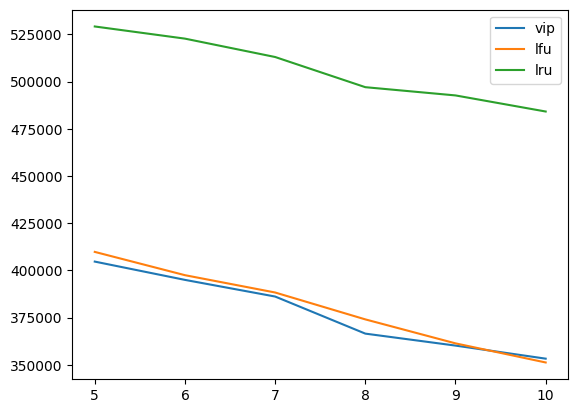

In [19]:
experiment_name = "big_st_cache_size"
topology = "abilene"
config_path = "../sim_configs/" + experiment_name + "_config.json"
db_path = "../sim_outputs/" + experiment_name + "_" + topology + "_db.json"
db = getJsonDb(db_path)


fig, ax = plt.subplots()


test_config = getTestConfig(config_path)
input_param_list = simConfigToParamSets(test_config)
filters = [("cache_pol","vip2",None), ("request_rate",15,None), ("request_dist_param", 0.625, None), ("cache_read_rates", (25,), None)]
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, test_config["source_map_seed"], test_config["request_generator_seed"], "delay")
ax.plot([5,6,7,8,9,10], res, label="vip")

filters = [("cache_pol","lfu",None), ("request_rate",15,None), ("request_dist_param", 0.625, None), ("cache_read_rates", (25,), None)]
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, test_config["source_map_seed"], test_config["request_generator_seed"], "delay")
ax.plot([5,6,7,8,9,10], res, label="lfu")

filters = [("cache_pol","lru",None), ("request_rate",15,None), ("request_dist_param", 0.625, None), ("cache_read_rates", (25,), None)]
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(topology, db, param_list, test_config["source_map_seed"], test_config["request_generator_seed"], "delay")
ax.plot([5,6,7,8,9,10], res, label="lru")

ax.legend(["vip","lfu","lru"])